In [59]:
import pandas as pd
import sqlite3
import shlex
import numpy as np
import collections
from matplotlib import pyplot as pl
import matplotlib.cm as cm

%matplotlib inline

def auto_cast(s):
    try:
        return int(s)
    except ValueError:
        try:
            return float(s)
        except ValueError:
            if s.lower() in ["false", "true"]:
                try:
                    return bool(s)
                except ValueError:
                    pass
    return str(s)

def cmd_parser(s, sort=False, template_dict=None):
    if '.py' in s:
        s = s.split('.py')[1]
    res = [x.split('=') if '=' in x else x.split(' ') for x in s.split(' --')[1:]]
    res = dict([(x[0], auto_cast(x[1])) if len(x) == 2 else (x[0], True) for x in res])
    if template_dict is not None:
        template_dict.update(res)
        res = template_dict        
    if sort:
        return collections.OrderedDict(sorted(res.items()))
    else:
        return res
    
default_flags = {'svm_test_interval': 10000, 'num_blocks': 3, 'visit_weight_base': 0.5, 'norm_weight': 0.0002, 'rvisit_weight': 1, 'emb_size': 128, 'cluster_hardening_weight': 0, 'warmup_steps': 1000, 'volta': False, 'virtual_embeddings_per_class': 4, 'visit_weight_add': 0, 'reg_warmup_steps': 1, 'eval_interval': 1000, 'num_augmented_samples': 3, 'trafo_weight': 0, 'unsup_batch_size': 100, 'num_unlabeled_images': 0, 'init_method': 'normal_center03', 'walker_weight': 1.0, 'beta2': 0.9, 'beta1': 0.8, 'l1_weight': 0.0002, 'scale_match_ab': 1, 'logit_weight': 0.5, 'normalize_embeddings': False, 'logdir': None, 'optimizer': 'adam', 'rwalker_weight': 1.0, 'learning_rate': 0.0002, 'shuffle_augmented_samples': False, 'centroid_momentum': 0, 'reg_decay_factor': 0.2, 'dataset': 'mnist', 'normalize_input': True, 'restore_checkpoint': None, 'init_with_kmeans': False, 'decay_factor': 0.33, 'decay_steps': 5000, 'architecture': 'mnist_model_dropout', 'logit_entropy_weight': 0, 'max_steps': 200000, 'dropout_keep_prob': 0.8}

In [60]:
# Establish DB connection
conn = sqlite3.connect("/usr/stud/plapp/runnn/runnn_data")
df = pd.read_sql_query("select * from tasks where score > 0;", conn)  # where status is 'done' and changed > '2017-11-05'
res_info = pd.read_sql_query("select * from result_info;", conn)
conn.close()

In [61]:
# Get list of hyper params
params = []
for row in df.cmd:
    params += ([x.split('=')[0] if '=' in x else x.split(' ')[0] for x in row.split(' --')[1:]])
params = np.unique(params).astype(str)  # is already sorted

all_params = default_flags.keys()
all_params.sort()

In [62]:
# Split params into columns
cmd_splitter = lambda x: pd.Series([i for i in cmd_parser(x, True, default_flags).values()])
df[all_params] = df.cmd.apply(cmd_splitter)

In [63]:
# Get list of result metrics
res_metrics = res_info.name.unique()

In [64]:
# Drop model_path and cast metrics to float
res_info = res_info[res_info.name != 'model_path']
res_info.value = res_info.value.astype(float)

In [65]:
# Pivot table and add to main data frame
res_metrics = res_info.pivot_table(values='value', index='ID_task', columns='name')
res_metrics.index.rename('ID_task')
#df_all = pd.merge(df, res_metrics, on='ID_task')

Int64Index([  21,   22,   23,   24,   25,   26,   27,   28,   29,   30,
            ...
            2382, 2383, 2384, 2385, 2386, 2387, 2388, 2389, 2390, 2391],
           dtype='int64', name=u'ID_task', length=1600)

In [66]:
res_metrics.iloc[0]

name
centroid_norm       3.1553
emb_norm            3.5681
estimated_error     0.9498
k_score             0.7226
reg_loss            1.4036
svm_score           0.9736
test_error          0.7263
train_loss         12.9839
Name: 21, dtype: float64

In [67]:
# Get list of datasets
datasets = [x for x in df.dataset.unique() if x == x]

In [68]:
df

,ID_task,ID_run,ID_client,cmd,params,status,log,changed,score,min_mem,...,shuffle_augmented_samples,svm_test_interval,trafo_weight,unsup_batch_size,virtual_embeddings_per_class,visit_weight_add,visit_weight_base,volta,walker_weight,warmup_steps
0,2,1,hpccremers1,python3 ~/lba_tf/semisup/train_unsup2.py --l1...,,cancelled,2017-10-29 23:13:47.084521: W tensorflow/core/...,2017-10-29 22:17:39,0.802100,5000,...,False,10000,0,50,4,0,0.5,False,1.0,1
1,3,1,hpccremers1,python3 ~/lba_tf/semisup/train_unsup2.py --l1...,,cancelled,2017-10-29 23:17:51.416034: W tensorflow/core/...,2017-10-29 22:21:35,0.861000,5000,...,False,10000,0,50,4,0,0.5,False,1.0,1
2,4,1,hpccremers1,python3 ~/lba_tf/semisup/train_unsup2.py --l1...,,cancelled,2017-10-29 23:21:47.435116: W tensorflow/core/...,2017-10-29 22:25:33,0.771200,5000,...,False,10000,0,50,4,0,0.5,False,1.0,1
3,5,1,hpccremers1,python3 ~/lba_tf/semisup/train_unsup2.py --l1...,,cancelled,2017-10-29 23:25:45.634942: W tensorflow/core/...,2017-10-29 22:29:34,0.868300,5000,...,False,10000,0,50,4,0,0.5,False,1.0,1
4,6,1,hpccremers1,python3 ~/lba_tf/semisup/train_unsup2.py --l1...,,cancelled,2017-10-29 23:29:46.257428: W tensorflow/core/...,2017-10-29 22:33:32,0.809700,5000,...,False,10000,0,50,4,0,0.5,False,1.0,1
5,7,1,hpccremers1,python3 ~/lba_tf/semisup/train_unsup2.py --l1...,,cancelled,2017-10-29 23:33:45.143944: W tensorflow/core/...,2017-10-29 22:37:30,0.757000,5000,...,False,10000,0,50,4,0,0.5,False,1.0,1
6,8,1,hpccremers1,python3 ~/lba_tf/semisup/train_unsup2.py --l1...,,cancelled,2017-10-29 23:37:45.055620: W tensorflow/core/...,2017-10-29 22:41:37,0.777400,5000,...,False,10000,0,50,4,0,0.5,False,1.0,1
7,9,1,hpccremers1,python3 ~/lba_tf/semisup/train_unsup2.py --l1...,,cancelled,2017-10-29 23:41:51.150329: W tensorflow/core/...,2017-10-29 22:45:40,0.729400,5000,...,False,10000,0,50,4,0,0.5,False,1.0,1
8,10,1,hpccremers1,python3 ~/lba_tf/semisup/train_unsup2.py --l1...,,cancelled,2017-10-29 23:45:59.958903: W tensorflow/core/...,2017-10-29 22:49:45,0.760500,5000,...,False,10000,0,50,4,0,0.5,False,1.0,1
9,11,2,hpccremers1,python3 ~/lba_tf/semisup/train_unsup2.py --da...,,cancelled,2017-10-29 23:51:37.538637: W tensorflow/core/...,2017-10-30 08:29:10,0.356875,5000,...,False,10000,0,50,4,0,0.5,False,1.0,1


In [69]:
print 'LEADERBOARD'
use_latest = 0
for dataset in datasets:
    ddf = df[df.dataset == dataset][-use_latest:]
    score_mean = ddf.score.mean() * 100
    score_std = ddf.score.std() * 100
    score_max = ddf.score.max() * 100
    score_max_taskid = ddf.ID_task[ddf.score.argmax()]
    print "%s:\t\t%.2f%%\t+/- %.2f (%d runs)\tbest: %.2f%% @ task %d" % (dataset[:6], score_mean, score_std, len(ddf), score_max, score_max_taskid)

LEADERBOARD
mnist:		87.22%	+/- 12.50 (1020 runs)	best: 98.97% @ task 2012
stl10:		70.81%	+/- 24.53 (175 runs)	best: 98.82% @ task 1289
cifar_:		63.61%	+/- 34.30 (38 runs)	best: 99.33% @ task 552
frgc:		43.33%	+/- 3.33 (379 runs)	best: 50.61% @ task 749


In [70]:
df

,ID_task,ID_run,ID_client,cmd,params,status,log,changed,score,min_mem,...,shuffle_augmented_samples,svm_test_interval,trafo_weight,unsup_batch_size,virtual_embeddings_per_class,visit_weight_add,visit_weight_base,volta,walker_weight,warmup_steps
0,2,1,hpccremers1,python3 ~/lba_tf/semisup/train_unsup2.py --l1...,,cancelled,2017-10-29 23:13:47.084521: W tensorflow/core/...,2017-10-29 22:17:39,0.802100,5000,...,False,10000,0,50,4,0,0.5,False,1.0,1
1,3,1,hpccremers1,python3 ~/lba_tf/semisup/train_unsup2.py --l1...,,cancelled,2017-10-29 23:17:51.416034: W tensorflow/core/...,2017-10-29 22:21:35,0.861000,5000,...,False,10000,0,50,4,0,0.5,False,1.0,1
2,4,1,hpccremers1,python3 ~/lba_tf/semisup/train_unsup2.py --l1...,,cancelled,2017-10-29 23:21:47.435116: W tensorflow/core/...,2017-10-29 22:25:33,0.771200,5000,...,False,10000,0,50,4,0,0.5,False,1.0,1
3,5,1,hpccremers1,python3 ~/lba_tf/semisup/train_unsup2.py --l1...,,cancelled,2017-10-29 23:25:45.634942: W tensorflow/core/...,2017-10-29 22:29:34,0.868300,5000,...,False,10000,0,50,4,0,0.5,False,1.0,1
4,6,1,hpccremers1,python3 ~/lba_tf/semisup/train_unsup2.py --l1...,,cancelled,2017-10-29 23:29:46.257428: W tensorflow/core/...,2017-10-29 22:33:32,0.809700,5000,...,False,10000,0,50,4,0,0.5,False,1.0,1
5,7,1,hpccremers1,python3 ~/lba_tf/semisup/train_unsup2.py --l1...,,cancelled,2017-10-29 23:33:45.143944: W tensorflow/core/...,2017-10-29 22:37:30,0.757000,5000,...,False,10000,0,50,4,0,0.5,False,1.0,1
6,8,1,hpccremers1,python3 ~/lba_tf/semisup/train_unsup2.py --l1...,,cancelled,2017-10-29 23:37:45.055620: W tensorflow/core/...,2017-10-29 22:41:37,0.777400,5000,...,False,10000,0,50,4,0,0.5,False,1.0,1
7,9,1,hpccremers1,python3 ~/lba_tf/semisup/train_unsup2.py --l1...,,cancelled,2017-10-29 23:41:51.150329: W tensorflow/core/...,2017-10-29 22:45:40,0.729400,5000,...,False,10000,0,50,4,0,0.5,False,1.0,1
8,10,1,hpccremers1,python3 ~/lba_tf/semisup/train_unsup2.py --l1...,,cancelled,2017-10-29 23:45:59.958903: W tensorflow/core/...,2017-10-29 22:49:45,0.760500,5000,...,False,10000,0,50,4,0,0.5,False,1.0,1
9,11,2,hpccremers1,python3 ~/lba_tf/semisup/train_unsup2.py --da...,,cancelled,2017-10-29 23:51:37.538637: W tensorflow/core/...,2017-10-30 08:29:10,0.356875,5000,...,False,10000,0,50,4,0,0.5,False,1.0,1


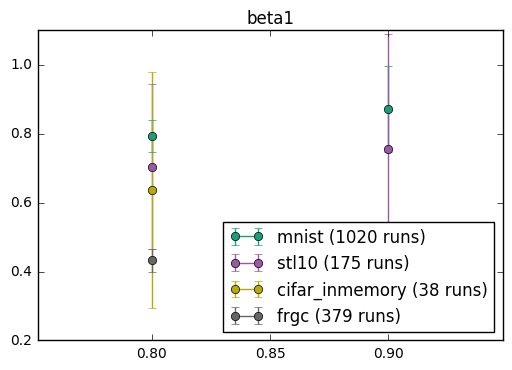

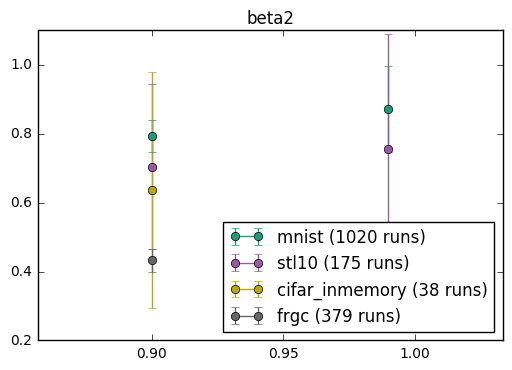

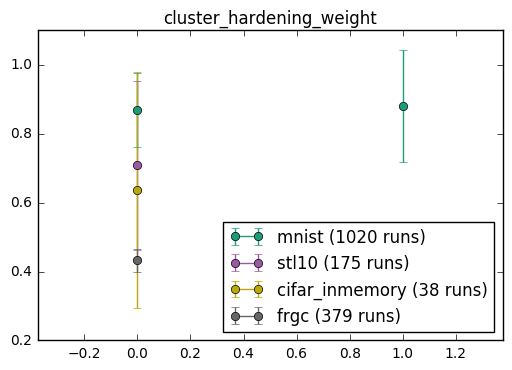

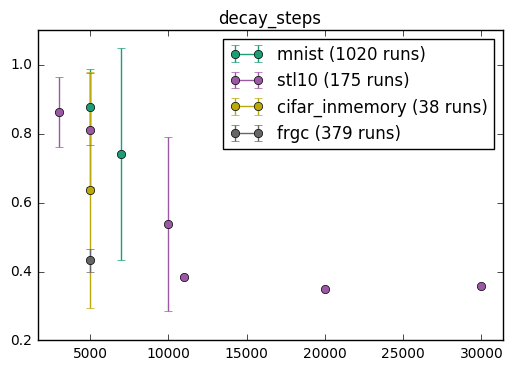

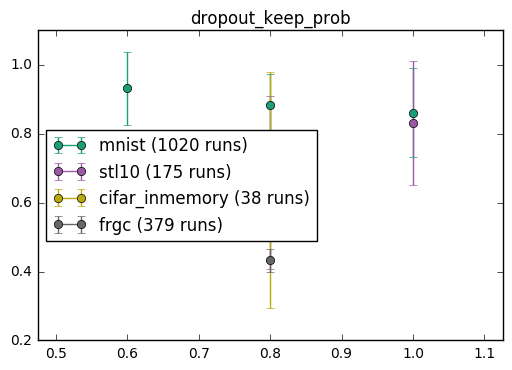

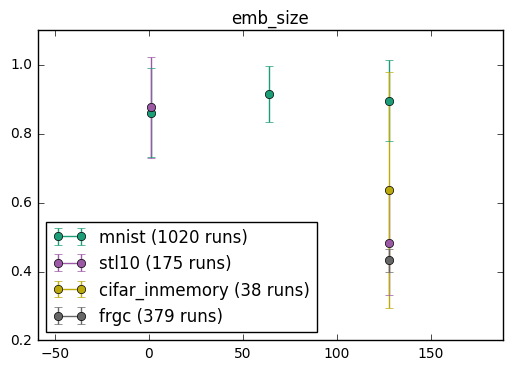

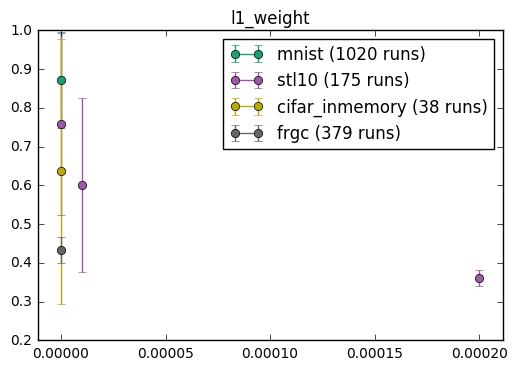

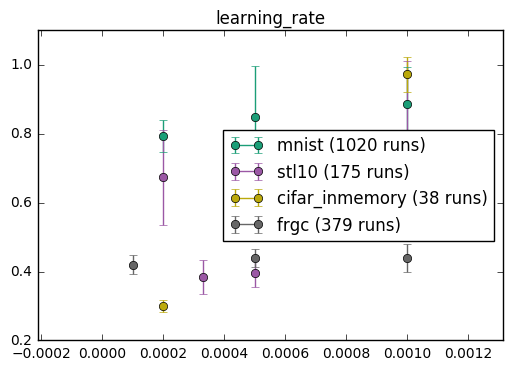

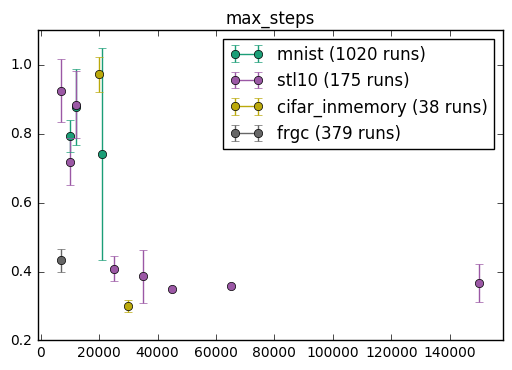

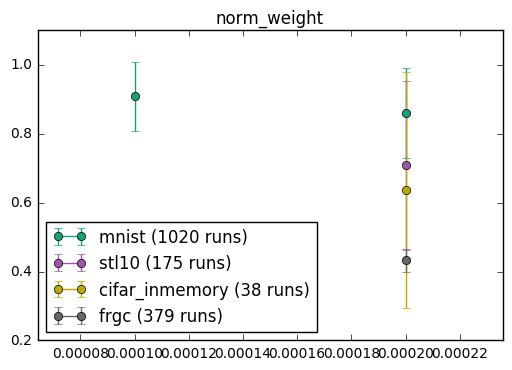

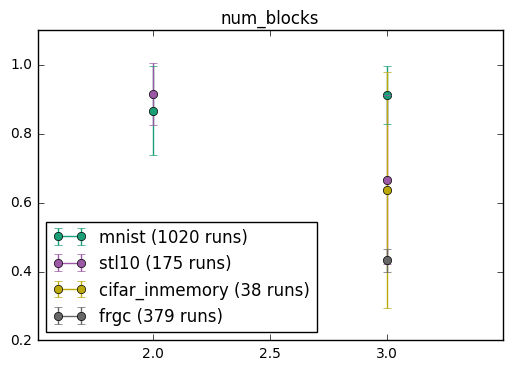

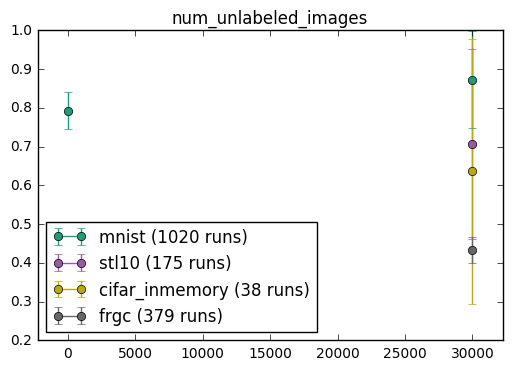

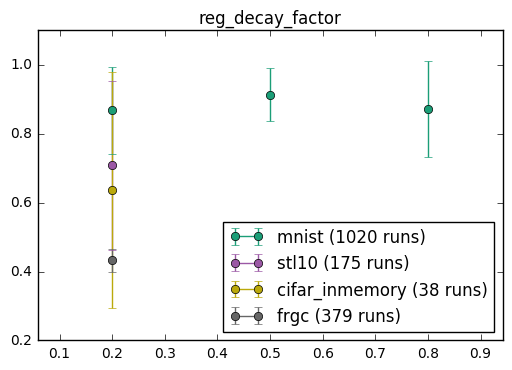

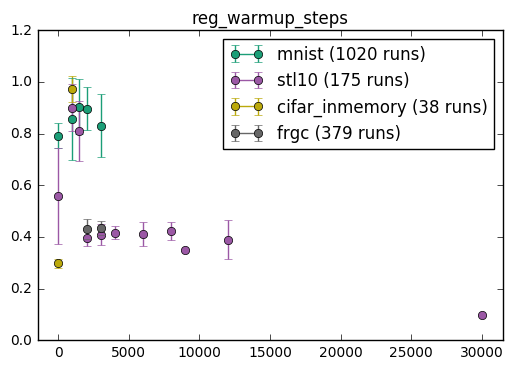

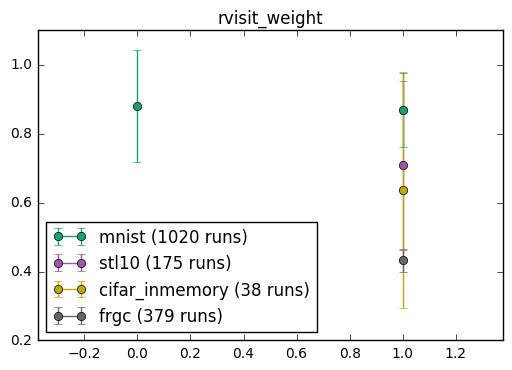

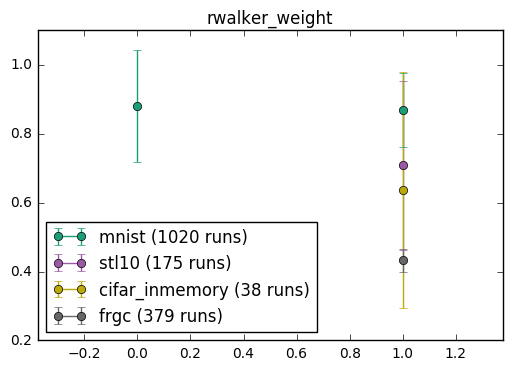

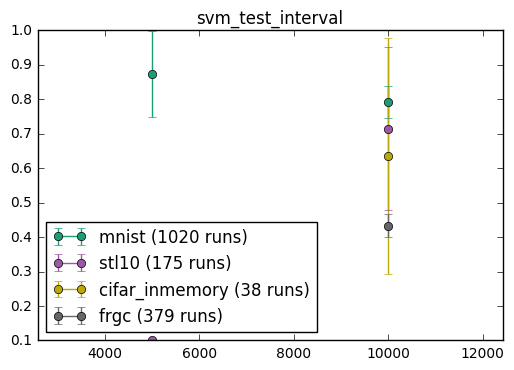

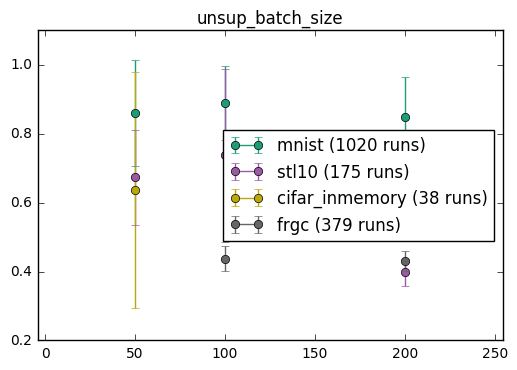

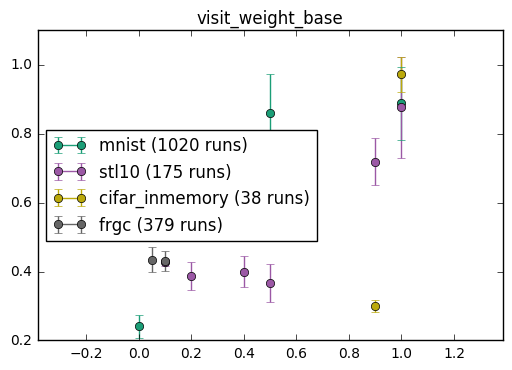

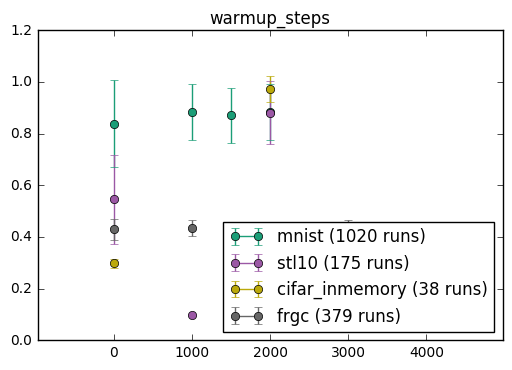

In [72]:
not_plot = ['architecture', 'dataset', 'init_with_kmeans', 'logdir']
use_latest = 0  # how many runs to consider; 0=all
metric_to_plot = 'score'

for param in params:
    if param in not_plot:
        continue
    
    xstd = df[param].std()
    xmin = df[param].min()-xstd
    xmax = df[param].max()+xstd

    colors = iter(cm.Dark2(np.linspace(0, 1, len(datasets))))
    #colors = iter(['r', 'g', 'b', 'y', 'k'])

    for dataset in datasets:
        ddf = df[df.dataset == dataset][-use_latest:]
        label = "%s (%d runs)" % (dataset, len(ddf))
        c = next(colors)
        xs = ddf[param].unique()
        xs = [i for i in xs if i==i]
        for x in xs:
            y = ddf[ddf[param] == x][metric_to_plot]
            yerr = y.std()
            y = y.mean()
            pl.errorbar(x, y, yerr=yerr, label=label, color=c, marker='o')

    pl.xlim((xmin, xmax))

    handles, labels = pyplot.gca().get_legend_handles_labels()
    newLabels, newHandles = [], []
    for handle, label in zip(handles, labels):
        if label not in newLabels:
            newLabels.append(label)
            newHandles.append(handle)
    pl.legend(newHandles, newLabels, loc='best')
    pl.title(param)
    pl.show()

In [73]:
df[df.ID_task==1289]

,ID_task,ID_run,ID_client,cmd,params,status,log,changed,score,min_mem,...,shuffle_augmented_samples,svm_test_interval,trafo_weight,unsup_batch_size,virtual_embeddings_per_class,visit_weight_add,visit_weight_base,volta,walker_weight,warmup_steps
547,1289,531,atcremers48,python3 ~/lba_tf/semisup/train_unsup2.py --arc...,,cancelled,2017-11-07 00:51:02.340874: W tensorflow/core/...,2017-11-07 00:11:19,0.9882,2000,...,False,10000,0,100,4,0,1.0,False,1.0,2000
